In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import requests
import os
import scipy.signal
import scipy.stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import KFold
from dateutil.relativedelta import relativedelta
import time
from dateutil.tz import gettz
from datetime import timedelta
import calendar
import datetime
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
# import xgboost as xgb
% matplotlib inline
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)


In [34]:
vacuum_p = pd.read_csv('disagData/vacuum_power.csv')
vacuum_p = vacuum_p.iloc[45:]
vacuum_p.reset_index(inplace=True, drop=True)
vacuum_h = pd.read_csv('disagData/vacuum_harmonics.csv')


df = pd.concat([vacuum_h,vacuum_p],axis=1)
df.iloc[:1000]

,ts,ihd03A,ihd05A,ihd07A,ithdA,ts,pwrA,rpwrA,curA,apwrA,screA
0,1.586872e+12,0.00,0.00,0.00,0.00,1586871847619,-0.0991,3.6477,0.0183,4.2765,1.504
1,1.586872e+12,0.00,0.00,0.00,0.00,1586871847639,-0.0660,4.0617,0.0182,4.2600,1.504
2,1.586872e+12,0.00,0.00,0.00,0.00,1586871847659,-0.0495,-1.7143,0.0181,4.2435,2.332
3,1.586872e+12,0.00,0.00,0.00,0.00,1586871847679,-0.0495,-1.4757,0.0180,4.2269,2.332
4,1.586872e+12,0.00,0.00,0.00,0.00,1586871847699,-0.0660,-1.4659,0.0180,4.2104,2.332
5,1.586872e+12,0.00,0.00,0.00,0.00,1586871847719,-0.0991,-0.3255,0.0180,4.2104,2.437
6,1.586872e+12,0.00,0.00,0.00,0.00,1586871847739,-0.1486,3.8445,0.0180,4.2104,2.437
7,1.586872e+12,0.00,0.00,0.00,0.00,1586871847759,-0.1651,-0.9254,0.0180,4.2104,2.708
8,1.586872e+12,0.00,0.00,0.00,0.00,1586871847779,-0.1486,-0.9245,0.0180,4.2269,2.708
9,1.586872e+12,0.00,0.00,0.00,0.00,1586871847799,-0.1321,3.9582,0.0181,4.2435,2.442


In [150]:
# Create and preprocess data for appliance: vacuum

vacuum_p = pd.read_csv('disagData/vacuum_power.csv')
vacuum_h = pd.read_csv('disagData/vacuum_harmonics.csv')
vacuum_h = vacuum_h.iloc[1000:6000]
vacuum_h.drop('ts',axis=1, inplace=True)
vacuum_p.drop('ts',axis=1, inplace=True)
vacuum_p = vacuum_p.iloc[1000:6000]
vacuum = pd.concat([vacuum_p[['pwrA','rpwrA']],vacuum_h],axis = 1)
vacuum.reset_index(inplace=True, drop=True)

# resample and extract features
vacuum_pr = pd.DataFrame([])
for col in vacuum.columns:
    vacuum_pr[col+'_mean'] = vacuum[col].groupby(np.arange(len(vacuum))//50).mean()
    vacuum_pr[col+'_std'] = vacuum[col].groupby(np.arange(len(vacuum))//50).std()
    vacuum_pr[col+'_min'] = vacuum[col].groupby(np.arange(len(vacuum))//50).min()
    vacuum_pr[col+'_max'] = vacuum[col].groupby(np.arange(len(vacuum))//50).max()
    
vacuum_pr['label'] = 1

# vacuum_pr.info()

In [151]:
# Create and preprocess data for appliance: laptop

laptop_p = pd.read_csv('disagData/laptop_power.csv')
laptop_h = pd.read_csv('disagData/laptop_harmonics.csv')
laptop_h = laptop_h.iloc[5000:8000]
laptop_h.drop('ts',axis=1, inplace=True)
laptop_p.drop('ts',axis=1, inplace=True)
laptop_p = laptop_p.iloc[5000:8000]
laptop = pd.concat([laptop_p[['pwrA','rpwrA']],laptop_h],axis = 1)
laptop.reset_index(inplace=True, drop=True)

# resample and extract features
laptop_pr = pd.DataFrame([])
for col in laptop.columns:
    laptop_pr[col+'_mean'] = laptop[col].groupby(np.arange(len(laptop))//50).mean()
    laptop_pr[col+'_std'] = laptop[col].groupby(np.arange(len(laptop))//50).std()
    laptop_pr[col+'_min'] = laptop[col].groupby(np.arange(len(laptop))//50).min()
    laptop_pr[col+'_max'] = laptop[col].groupby(np.arange(len(laptop))//50).max()
    
laptop_pr['label'] = 2
# laptop_pr.info()

In [162]:
# Create and preprocess data for appliance: hairdryer

hairdryer_p = pd.read_csv('disagData/hairdryer_power.csv')
hairdryer_h = pd.read_csv('disagData/hairdryer_harmonics.csv')
hairdryer_h = hairdryer_h.iloc[50:400]
hairdryer_h.reset_index(inplace=True, drop=True)
hairdryer_h.drop('ts',axis=1, inplace=True)
hairdryer_h = hairdryer_h[['ihd03A','ihd05A','ihd07A','ithdA']]
hairdryer_p.drop('ts',axis=1, inplace=True)
hairdryer_p = hairdryer_p.iloc[1000:1350]
hairdryer_p.reset_index(inplace=True, drop=True)

hairdryer = pd.concat([hairdryer_p[['pwrA','rpwrA']],hairdryer_h],axis = 1)
hairdryer.reset_index(inplace=True, drop=True)

# resample and extract features
hairdryer_pr = pd.DataFrame([])
for col in hairdryer.columns:
    hairdryer_pr[col+'_mean'] = hairdryer[col].groupby(np.arange(len(hairdryer))//50).mean()
    hairdryer_pr[col+'_std'] = hairdryer[col].groupby(np.arange(len(hairdryer))//50).std()
    hairdryer_pr[col+'_min'] = hairdryer[col].groupby(np.arange(len(hairdryer))//50).min()
    hairdryer_pr[col+'_max'] = hairdryer[col].groupby(np.arange(len(hairdryer))//50).max()
    
hairdryer_pr['label'] = 3

# hairdryer_pr.info()

In [153]:
# Create and preprocess data for appliance: treadmill

# treadmill_p = pd.read_csv('disagData/treadmill_power.csv')
# treadmill_h = pd.read_csv('disagData/treadmill_harmonics.csv')
# treadmill_h = treadmill_h.iloc[1000:3500]
# treadmill_h.drop('ts',axis=1, inplace=True)
# treadmill_p.drop('ts',axis=1, inplace=True)
# treadmill_p = treadmill_p.iloc[1000:3500]
# treadmill = pd.concat([treadmill_p[['pwrA','rpwrA']],treadmill_h],axis = 1)
# treadmill.reset_index(inplace=True, drop=True)

# # resample and extract features
# treadmill_pr = pd.DataFrame([])
# for col in treadmill.columns:
#     treadmill_pr[col+'_mean'] = treadmill[col].groupby(np.arange(len(treadmill))//50).mean()
#     treadmill_pr[col+'_std'] = treadmill[col].groupby(np.arange(len(treadmill))//50).std()
#     treadmill_pr[col+'_min'] = treadmill[col].groupby(np.arange(len(treadmill))//50).min()
#     treadmill_pr[col+'_max'] = treadmill[col].groupby(np.arange(len(treadmill))//50).max()
    
# treadmill_pr['label'] = 3

In [171]:
df = pd.concat([vacuum_pr,hairdryer_pr,laptop_pr],axis=0,sort=False)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 25 columns):
pwrA_mean      167 non-null float64
pwrA_std       167 non-null float64
pwrA_min       167 non-null float64
pwrA_max       167 non-null float64
rpwrA_mean     167 non-null float64
rpwrA_std      167 non-null float64
rpwrA_min      167 non-null float64
rpwrA_max      167 non-null float64
ihd03A_mean    167 non-null float64
ihd03A_std     167 non-null float64
ihd03A_min     167 non-null float64
ihd03A_max     167 non-null float64
ihd05A_mean    167 non-null float64
ihd05A_std     167 non-null float64
ihd05A_min     167 non-null float64
ihd05A_max     167 non-null float64
ihd07A_mean    167 non-null float64
ihd07A_std     167 non-null float64
ihd07A_min     167 non-null float64
ihd07A_max     167 non-null float64
ithdA_mean     167 non-null float64
ithdA_std      167 non-null float64
ithdA_min      167 non-null float64
ithdA_max      167 non-null float64
label          167 non-null int

In [175]:
y = df['label'].values
X = df.drop('label',axis=1)
X = preprocessing.MinMaxScaler().fit_transform(X)

In [189]:
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)
# clf = DecisionTreeClassifier(random_state=0)
clf = KNeighborsClassifier(n_neighbors=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    clf = clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print('y pred:',y_pred)
    print('y test:',y_test)
    print('acc of fold is:',acc)

y pred: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
y test: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
acc of fold is: 1.0
y pred: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
y test: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
acc of fold is: 1.0
y pred: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
y test: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
acc of fold is: 1.0
y pred: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
y test: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
acc of fold is: 1.0
y pred: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
y test: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
acc of fold is: 1.0
y pred: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
y test: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
acc of fold is: 1.0
y pred: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
y test: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2]
acc of fold is: 1.0
y pred: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
y test: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
acc of fold is: 1.0
y pred: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
y test: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
acc of fold is: 1.0
y pred: [1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2

C:\Users\Emily\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


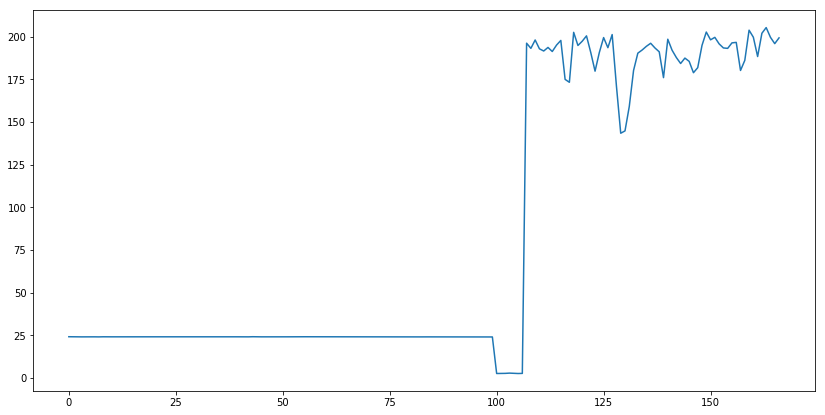

In [192]:
fig = plt.figure(figsize=[14,7])
plt.plot(df.index,df['ithdA_mean'])